<a href="https://colab.research.google.com/github/arditolaksono/FIT/blob/master/Pencarian_Rute_Tercepat_Menggunakan_Tabu_Search_Algoritma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

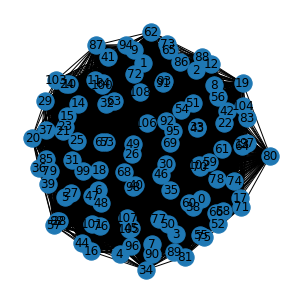

In [1]:
# Inisialisasi grafik
import networkx as nx
import random
import matplotlib.pyplot as plt
import math

G = nx.complete_graph(109)
for (u,v) in G.edges():
    G.edges[u,v]['weight'] = random.randint(0,10)

plt.figure(figsize=(4,4))
nx.draw(G, with_labels=True)
plt.show()

In [ ]:
# Tentukan fungsi untuk menghitung nilai putaran
def cost_of_tour(G, tour):
    cost = 0
    for u, v in zip(tour, tour[1:]):
        cost += G[u][v]["weight"]
    cost += G[len(tour) - 1][0]["weight"]
    return cost

In [ ]:
def get_best_neighbour(G, tour, tabu_history, tabu_limit, aspiration):
    best_neighbour = None
    best_neighbour_cost = math.inf
    # buat daftar semua kemungkinan tetangga
   # tetangga langsung menukar posisi dua node dalam tur
    for i in range(len(G.nodes)):
        for j in range(len(G.nodes)):
            if i == j:
                continue

           # Tukar simpul ke-i dan ke-j
            tmp_route = tour.copy()
            tmp = tmp_route[i]
            tmp_route[i] = tmp_route[j]
            tmp_route[j] = tmp
            tmp_cost = cost_of_tour(G, tmp_route)

            # rute ini tabu, memeriksa aspirasi
            if tuple(tmp_route) in tabu_history:
                if tabu_history[tuple(tmp_route)] > 0:
                    if tabu_history[tuple(tmp_route)] > aspiration:
                        continue

            if tmp_cost < best_neighbour_cost:
                best_neighbour_cost = tmp_cost
                best_neighbour = tmp_route
                tabu_history[tuple(best_neighbour)] = tabu_limit

    return best_neighbour

In [ ]:
def tabu_search(
    G,
    initial_solution,
    num_iter,
    tabu_history,
    tabu_limit,
    aspiration,
    cost_function,
    neighbour_function,
    use_historical_best=False,
    use_tqdm = False
):
    best_solution = initial_solution
    historical_best = best_solution
    historical_best_cost = cost_function(G,historical_best)
    best_cost = cost_function(G, best_solution)
    states = [best_cost]
    if use_tqdm:
        pbar = tqdm(total=num_iter)
    for _ in range(num_iter):
        if use_tqdm: pbar.update()
        for x in tabu_history:
            tabu_history[x] -= 1
        tabu_history = {x: tabu_history[x] for x in tabu_history if tabu_history[x] > 0}

        best_solution = neighbour_function(
            G, best_solution, tabu_history, tabu_limit, aspiration
        )
        best_cost = cost_function(G, best_solution)
        if best_cost <= historical_best_cost: 
            historical_best = best_solution
            historical_best_cost = best_cost
        states.append(best_cost)
    return best_solution, best_cost, states

Initial solution: [14, 19, 100, 73, 11, 5, 94, 102, 38, 76, 15, 92, 97, 56, 91, 103, 80, 89, 17, 44, 37, 28, 22, 50, 99, 66, 9, 33, 1, 45, 83, 101, 35, 30, 84, 54, 55, 71, 98, 23, 3, 7, 24, 81, 62, 96, 59, 31, 65, 49, 25, 42, 57, 8, 86, 107, 90, 79, 72, 48, 2, 29, 87, 40, 26, 18, 108, 69, 105, 95, 46, 53, 67, 20, 70, 77, 104, 58, 52, 34, 51, 63, 12, 21, 43, 32, 47, 4, 75, 41, 39, 64, 36, 27, 93, 0, 78, 60, 16, 82, 10, 88, 106, 85, 68, 61, 6, 13, 74]
Initial cost: 551
Best Solution: [14, 35, 86, 21, 11, 78, 76, 72, 37, 38, 7, 71, 99, 56, 98, 103, 40, 45, 17, 44, 95, 59, 22, 20, 97, 66, 25, 33, 1, 87, 83, 30, 51, 19, 47, 54, 88, 90, 91, 23, 3, 18, 24, 81, 69, 74, 28, 107, 2, 49, 42, 48, 57, 58, 100, 31, 102, 79, 92, 9, 65, 29, 60, 80, 26, 15, 108, 96, 85, 94, 77, 82, 67, 5, 70, 106, 104, 8, 52, 34, 101, 27, 43, 73, 12, 32, 46, 64, 75, 41, 36, 4, 39, 63, 93, 105, 0, 89, 16, 53, 10, 55, 84, 50, 68, 61, 6, 13, 62]
Best Cost: 71


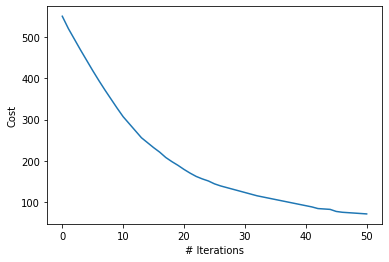

In [ ]:
# inisialisasi beberapa parameter
aspiration = 2
tabu_history = {}
num_iterations = 50
tabu_limit = 5

# inisialisasi solusi acak, dan nilai
initial_solution = [*G.nodes()]
random.shuffle(initial_solution)
initial_cost = cost_of_tour(G, initial_solution)
print(f"Initial solution: {initial_solution}")
print(f"Initial cost: {initial_cost}")

best_solution, best_cost, states = tabu_search(
    G,
    initial_solution,
    num_iterations,
    tabu_history,
    tabu_limit,
    aspiration,
    cost_of_tour,
    get_best_neighbour,
)
print(f"Best Solution: {best_solution}")
print(f"Best Cost: {best_cost}")
plt.xlabel("# Iterations")
plt.ylabel("Cost")
plt.plot(states)
plt.show()